<a href="https://colab.research.google.com/github/mvlier/topapprox/blob/main/Reproducing_paper_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BEWARE:** Some cells might show an error when running for the first time. In that case running that cell one more time should resolve the problem.

# Installing necessary packages

In [1]:
!pip install git+https://github.com/mvlier/topapprox@main
!pip install -U -q cripser persim

  Cloning https://github.com/mvlier/topapprox (to revision main) to /tmp/pip-req-build-u87isva0
  Running command git clone --filter=blob:none --quiet https://github.com/mvlier/topapprox /tmp/pip-req-build-u87isva0
  Resolved https://github.com/mvlier/topapprox to commit 47bf3739eba34fc4e7d53f6a280d4fc4a92a069d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for topapprox: filename=topapprox-0.0.2-py3-none-any.whl size=9310 sha256=52b0ffee677b4612ed0937a151170211dc91dabab743578af2f53393dfa77e31
  Stored in directory: /tmp/pip-ephem-wheel-cache-tvorva77/wheels/49/17/71/71c98f055e9b71cd32cab64370e89376d750f95bf7f991d9c2
Successfully built topapprox
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.0 MB/s eta 0:00:00


In [8]:
import topapprox as ta
import cripser
import persim
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Example V.1 (1D signal)

Text(0.5, 1.0, '0-LPF eps=2.4')

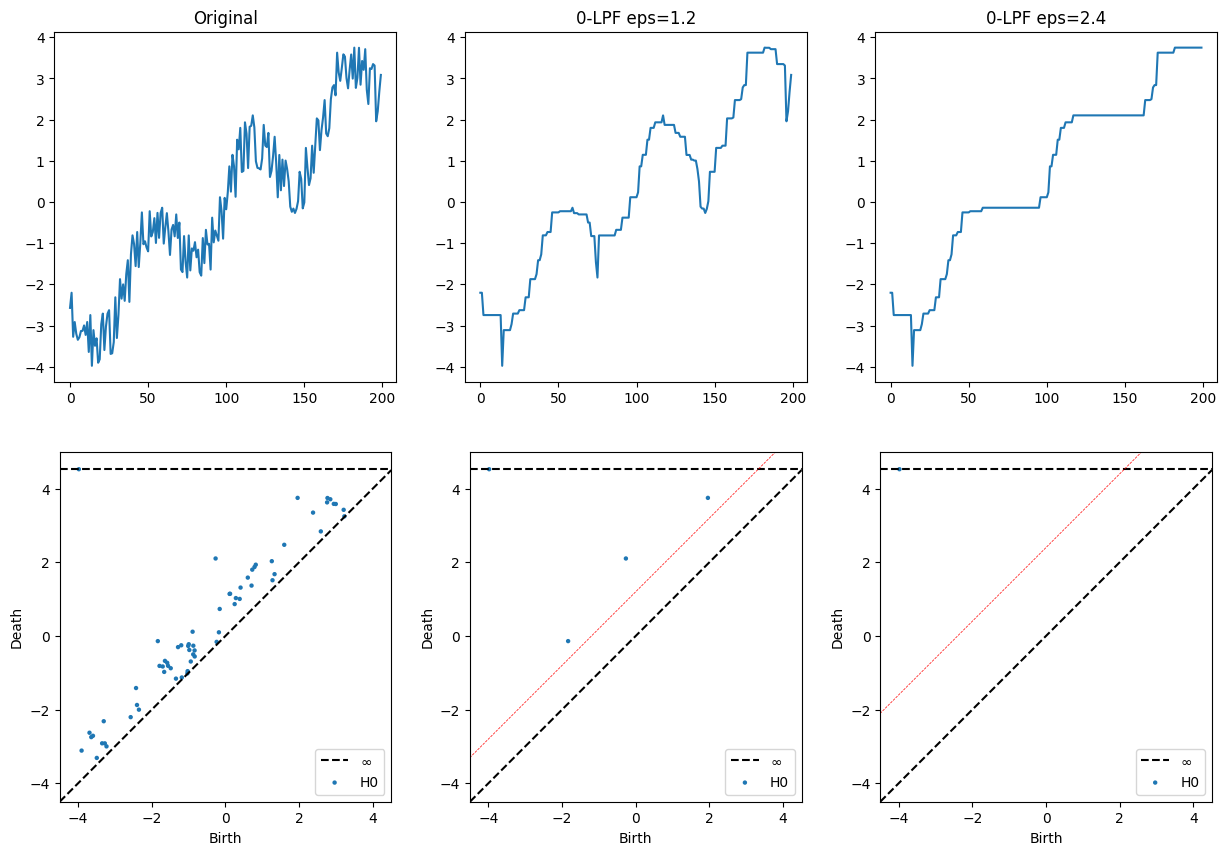

In [9]:
##################
# Creating Signal#
##################

m=200 # resolution
noise = 0.7 # noise level
s=1.2 ## life threshold = simplification strength

# create a sample signal
y, x = np.mgrid[0:1, -10:10:m*1j]
img = np.sin(x)+0.3*x
img_original = img.copy()
np.random.seed(1)
img += np.random.uniform(-noise,noise,img.shape)


#################################
# Computing and plotting results#
#################################

fig, axs = plt.subplots(2,3,figsize=(15,10))

# original signal and persistence
axs[0,0].plot(img.ravel())
uf = ta.TopologicalFilterImage(img)
newimg = uf.low_pers_filter(epsilon=0)
PD = cripser.computePH(newimg)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,labels=["H0"],size=10,ax=axs[1,0], xy_range = [-4.5,4.5,-4.5,5])
#axs[1,0].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
axs[0,0].set_title(f'Original')


s=1.2
# lpf_0 with eps = 1.2
img2 = uf.low_pers_filter(epsilon=s)
axs[0,1].plot(img2.ravel(), label="Filtered function")
#axs[0,1].plot(img_original.ravel(), label="Trend")
#axs[0,1].legend(loc='lower right')
uf2 = ta.TopologicalFilterImage(img2)
newimg = uf.low_pers_filter(epsilon=s)
PD = cripser.computePH(newimg)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,labels=["H0"],size=10,ax=axs[1,1], xy_range = [-4.5,4.5,-4.5,5])
axs[1,1].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
axs[0,1].set_title(f'0-LPF eps={s}')


s = 2.4
# lpf_0 with eps = 2.4
img2 = uf.low_pers_filter(epsilon=s)
axs[0,2].plot(img2.ravel())
uf2 = ta.TopologicalFilterImage(img2)
newimg = uf.low_pers_filter(epsilon=s)
PD = cripser.computePH(newimg)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,labels=["H0"],size=10,ax=axs[1,2],xy_range = [-4.5,4.5,-4.5,5] )
axs[1,2].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
axs[0,2].set_title(f'0-LPF eps={s}')

# plt.savefig('1D-toy-example.pdf')

# Example V.2 (2D signal)

In [44]:
# Defining the scalar field to be used in the example
def scalar_field(x,y):
    np.random.seed(0)
    M = 300
    a = np.random.rand(M, 2)*8 + 1
    c = np.random.rand(M)*0.3 + 0.1
    b = 100
    m = c.size
    result = 0
    for i in range(m):
        result += 1 / (b*(x - a[i][0])**2 + b*(y - a[i][1])**2 + c[i])

    a = np.random.rand(M, 2)*8 + 1
    c = np.random.rand(M)*0.3 + 0.1
    m = c.size
    result2 = 0
    for i in range(m):
        result2 += 1 / (b*(x - a[i][0])**2 + b*(y - a[i][1])**2 + c[i])

    Z = result - result2
    Z2 = (x-5)**2 + 3*(y-5)**2
    Z = Z + Z2

    return Z

x = np.linspace(0, 10, 500)
y = np.linspace(0, 10, 500)
X, Y = np.meshgrid(x, y)
surface = scalar_field(X, Y)

In [45]:
# 3D plot settings for better visualization
def plot3D(M, *, with_titles=False, title=None, vmin=None, vmax=None):
    x = np.linspace(0, 500, M.shape[1])  # X-coordinates
    y = np.linspace(0, 500, M.shape[0])  # Y-coordinates
    X, Y = np.meshgrid(x, y)  # Create the meshgrid for X and Y

    # Plot the matrix M in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Use plot_surface to plot the matrix M
    ax.plot_surface(X, Y, M, cmap='viridis', vmin=vmin, vmax=vmax)

    # Change the perspective
    ax.view_init(elev=10, azim=20)


    # ax.set_ylim(-5,5)
    ax.set_zlim(-10,25)
    # ax.set_xlim(-10,2)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    # x = np.linspace(0, 500, M.shape[1])  # X-coordinates
    # y = np.linspace(0, 500, M.shape[0])  # Y-coordinates
    # X, Y = np.meshgrid(x, y)  # Create the meshgrid for X and Y
    # X, Y = np.meshgrid(x, y)  # Create the meshgrid for X and Y
    ax.plot_surface(X[:, -10:], Y[:, -10:], M[:, -10:], color='red', vmin=vmin, vmax=vmax)
    ax.plot_surface(X[-5:, :], Y[-5:, :], M[-5:, :], color='blue', vmin=vmin, vmax=vmax)
    ax.plot_surface(X[:, :10], Y[:, :10], M[:, :10]+0.5, color='red', vmin=vmin, vmax=vmax)
    ax.plot_surface(X[:5, :], Y[:5, :], M[:5, :]+0.5, color='blue', vmin=vmin, vmax=vmax)

    # ax.grid(False)
    # ax.axis('off')

    if with_titles:
        plt.title(title, fontsize = 26)

    #plt.show()
    plt.savefig('shekel-simplified.pdf', bbox_inches='tight')

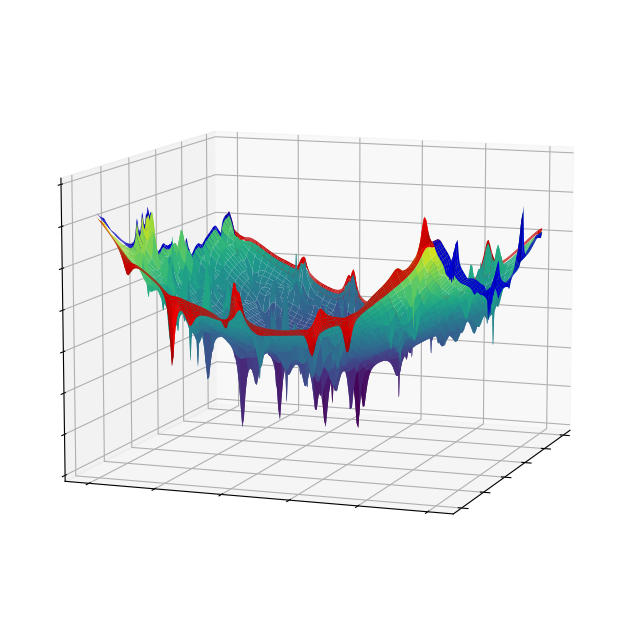

In [47]:
plot3D(surface[150:350, 150:400])

In [48]:
# Filtering persitent 0-homology
tf3D_0 = ta.TopologicalFilterImage(surface)
surface_0 = tf3D_0.low_pers_filter(1e+5) #Filtering all finite persistence

#Filtering persitent 1-homology
tf3D_1 = ta.TopologicalFilterImage(surface_0, dual=True)
surface_filtered = tf3D_1.low_pers_filter(1e+5)

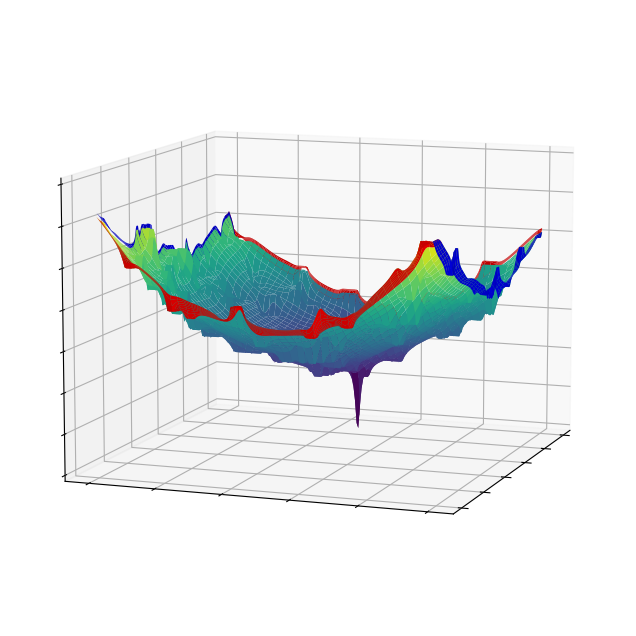

In [49]:
plot3D(surface_filtered[150:350, 150:400])

# Example V.3 (Natural image)

In [51]:
img = np.load('pagoda.npy')

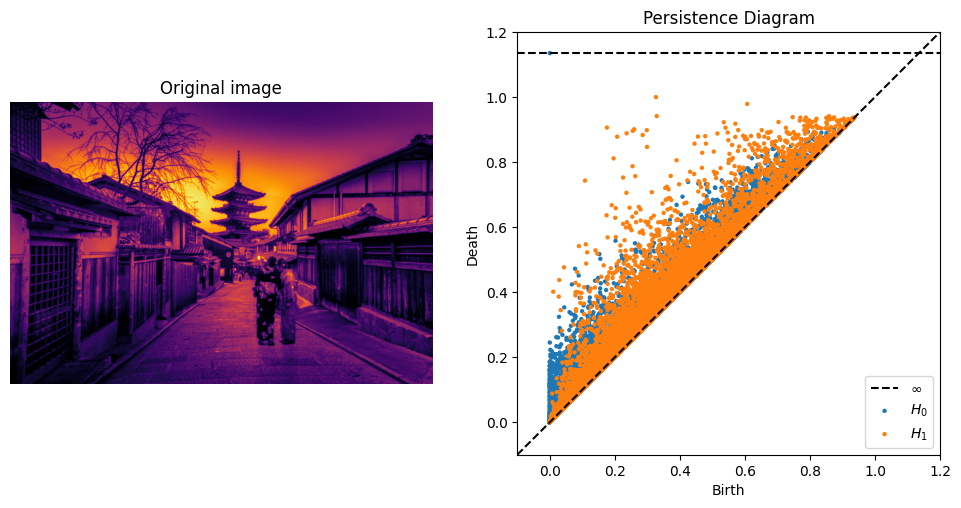

In [72]:
# Plotting original image with its persistence diagram
fig, ax = plt.subplots(1,2, figsize=(12,24))
ax[0].imshow(img, cmap='inferno')
ax[0].axis('off')
ax[0].title.set_text('Original image')
PD = cripser.computePH(img)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,size=10,ax=ax[1],xy_range = [-0.1,1.2,-0.1,1.2])
ax[1].title.set_text('Persistence Diagram')

In [70]:
# Filtering image by a threshold of 0.0704
e1 = 0.0704

# Filtering persitent 0-homology
tf_imga_0 = ta.TopologicalFilterImage(img)
img_1 = tf_imga_0.low_pers_filter(e1)

#Filtering persitent 1-homology
tf_imga_1 = ta.TopologicalFilterImage(img_1, dual=True)
imga = tf_imga_1.low_pers_filter(e1)


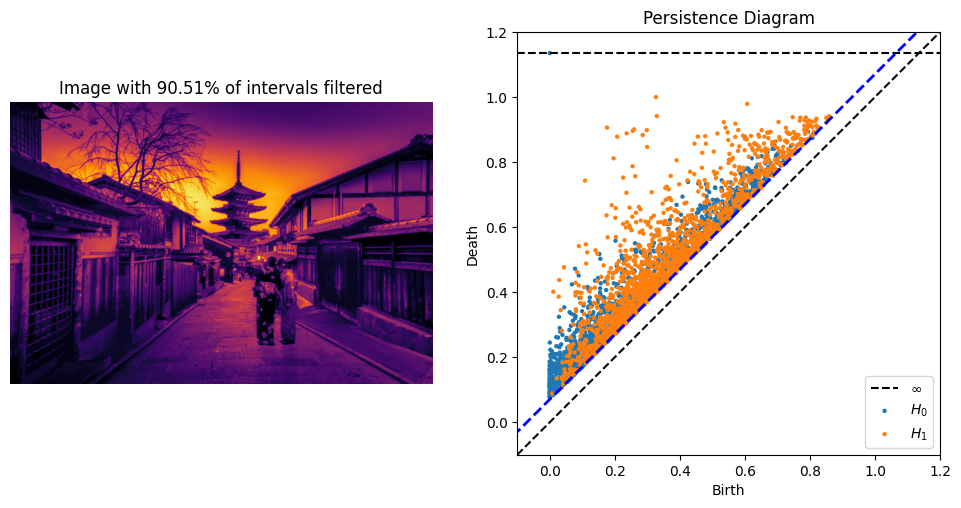

In [89]:
# Plotting original image with its persistence diagram
fig, ax = plt.subplots(1,2, figsize=(12,24))
ax[0].imshow(imga, cmap='inferno')
ax[0].axis('off')
ax[0].title.set_text('Image with 90.51% of intervals filtered')
PDa = cripser.computePH(imga)
PDa = [PDa[PDa[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PDa,size=10,ax=ax[1],xy_range = [-0.1,1.2,-0.1,1.2])
ax[1].title.set_text('Persistence Diagram')
ax[1].plot([-100,100], [-100+e1,100+e1], '--', linewidth=2.0, c="b")

In [81]:
percentage_filtered_a = (1 - (PDa[0].size + PDa[1].size) / (PD[0].size + PD[1].size)) * 100
print(f'The exact percentage of filtered intervals in the case above is {percentage_filtered_a}')

The exact percentage of filtered intervals in the case above is 90.5130090363589


In [83]:
# Filtering image by a threshold of 0.3022
e2 = 0.3022

# Filtering persitent 0-homology
tf_imgb_0 = ta.TopologicalFilterImage(img)
imgb_1 = tf_imgb_0.low_pers_filter(e2)

#Filtering persitent 1-homology
tf_imgb_1 = ta.TopologicalFilterImage(imgb_1, dual=True)
imgb = tf_imgb_1.low_pers_filter(e2)

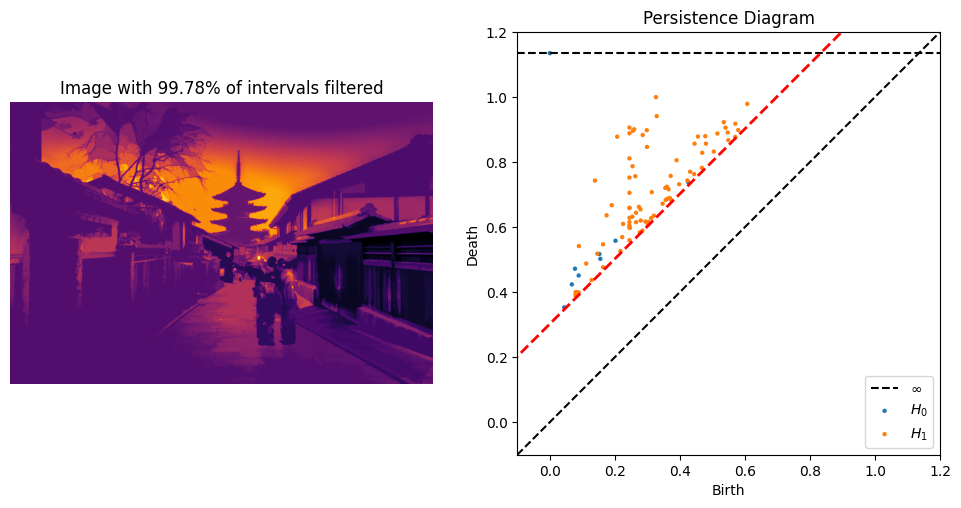

In [86]:
# Plotting original image with its persistence diagram
fig, ax = plt.subplots(1,2, figsize=(12,24))
ax[0].imshow(imgb, cmap='inferno')
ax[0].axis('off')
ax[0].title.set_text('Image with 99.78% of intervals filtered')
PDb = cripser.computePH(imgb)
PDb = [PDb[PDb[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PDb, size=10,ax=ax[1],xy_range = [-0.1,1.2,-0.1,1.2])
ax[1].title.set_text('Persistence Diagram')
ax[1].plot([-100,100], [-100+e2,100+e2], '--', linewidth=2.0, c="r")

In [85]:
percentage_filtered_b = (1 - (PDb[0].size + PDb[1].size) / (PD[0].size + PD[1].size)) * 100
print(f'The exact percentage of filtered intervals in the case above is {percentage_filtered_b}')

The exact percentage of filtered intervals in the case above is 99.77942746009535


# Example V.4 (Signal over a mesh)

In [114]:
import plotly.graph_objects as go
import csv

In [115]:
V = np.load('mesh_vertices.npy')
F = np.load('mesh_faces.npy')

In [120]:
# Function file path
func_path = 'func' + '.csv'

# Open the CSV file
with open(func_path, newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    Function = list(csvreader)

# Eliminate header and transform into np array
Function = Function[1:]
Function = [[int(x[0]), x[1]] for x in Function]
Function = sorted(Function)
Function = [float(x[1]) for x in Function]
#Function = np.float64(Function)

cmin = np.min(Function)
cmax = np.max(Function)

In [121]:
# Open the CSV file
with open(func_path, newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    func_ = list(csvreader)

# Eliminate header and change format, from list to dictionary
func_dict = {x[0]:float(x[1]) for x in func_[1:]}

In [118]:
def plot_mesh(v, f, func, cmin, cmax):
    data = go.Mesh3d(
            #Vertices
            x=v[0],
            y=v[1],
            z=v[2],
            #colorbar_title='z',
            colorscale=[[0, '#440154'],
                        [0.24, '#481a6c'],
                        [0.35, '#3b528b'],
                        [0.5, '#21918c'],
                        [0.65, '#5ec962'],
                        [0.8, '#d2e21b'],
                        [1, '#fde725']],
            #colorscale = 'bluered',
            cmin = cmin,
            cmax = cmax,
            # Intensity of each vertex, which will be interpolated and color-coded
            intensity=func,
            #Faces
            i=f[0],
            j=f[1],
            k=f[2],
            name='y',
            showscale=True,
            colorbar=dict(
                x=0.85,  # Adjust the color bar position closer to the plot
                thickness=20,
                len = 0.8
            )
        )

    fig = go.Figure(data = [data])

    a = 1.17

    fig.update_layout(
        scene_camera=dict(
            eye=dict(x=-1*a, y=-1*a, z=0.5*a)
        )
    )

    fig.update_layout(
        scene=dict(
            xaxis=dict(showticklabels=False, title=''),
            yaxis=dict(showticklabels=False, title=''),
            zaxis=dict(showticklabels=False, title=''),
        )
    )

    fig.update_layout(scene = dict(xaxis = dict(showgrid = False),
                                    yaxis = dict(showgrid = False),
                                    zaxis = dict(showgrid = False)
                ))
    fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False )

    return fig

Original scalar field over mesh

In [122]:
plot_mesh(V, F, Function, cmin, cmax)

In [127]:
faces = np.array([[F[0][i],F[1][i],F[2][i]] for i in range(F[0].size)])

In [128]:
eps = 0.2
tfg = ta.TopologicalFilterGraph()
tfg.from_faces(faces,func_dict)
_ = tfg.compute(epsilon = eps)
filtered_0 = tfg.get_modified_filtration()

In [142]:
Function_0 = sorted([[int(k),float(v)] for k,v in filtered_0.items()])
Function_0 = np.array([x[1] for x in Function_0])

Filtered Scalar Fields - after filtering only persistent 0-homology below the threshold eps=0.2


In [144]:
plot_mesh(V, F, Function_0, cmin, cmax)

In [149]:
eps = 0.2
tfgd = ta.TopologicalFilterGraph()
tfgd.from_faces(faces,filtered_0)
_ = tfgd.compute(epsilon = eps, dual=True)
filtered_01 = tfgd.get_modified_filtration()

In [150]:
Function_01 = sorted([[int(k),float(v)] for k,v in filtered_01.items()])
Function_01 = np.array([x[1] for x in Function_01])

Filtered Scalar Fields - after filtering both persistent 0- and 1-homology below the threshold eps=0.2


In [152]:
plot_mesh(V, F, Function_01, cmin, cmax)

### Plotting persistence diagrams for the tree scalar fields over the mesh

In [157]:
PD_original = tfg.get_diagram()
PD_0 = tfgd.get_diagram()
tfg2 = ta.TopologicalFilterGraph()
tfg2.from_faces(faces,filtered_01)
_ = tfg2.compute(0)
PD_01 = tfg2.get_diagram()

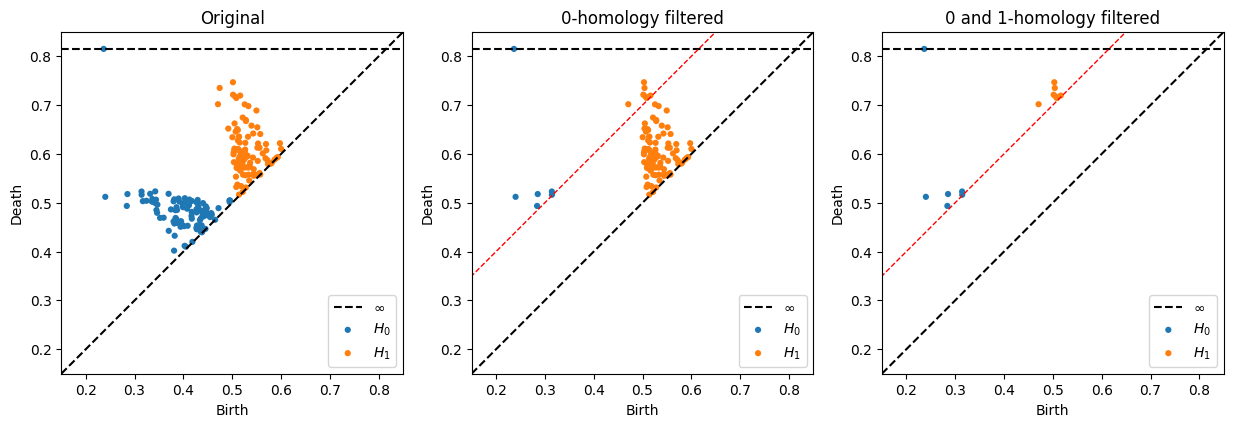

In [163]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
persim.plot_diagrams(PD_original, ax=ax[0], xy_range = [0.15, 0.85, 0.15, 0.85])
persim.plot_diagrams(PD_0, ax=ax[1], xy_range = [0.15, 0.85, 0.15, 0.85])
persim.plot_diagrams(PD_01, ax=ax[2], xy_range = [0.15, 0.85, 0.15, 0.85])
ax[1].plot([-100,100], [-100+eps,100+eps], '--', linewidth=1.0, c="r")
ax[2].plot([-100,100], [-100+eps,100+eps], '--', linewidth=1.0, c="r")
ax[0].title.set_text('Original')
ax[1].title.set_text('0-homology filtered')
ax[2].title.set_text('0 and 1-homology filtered')